Dataset Shape: (1000, 8)

Missing Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


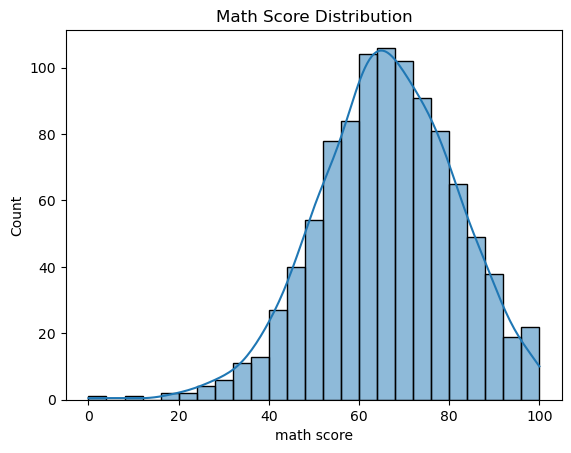

R² Score: 0.88
Mean Squared Error: 29.10


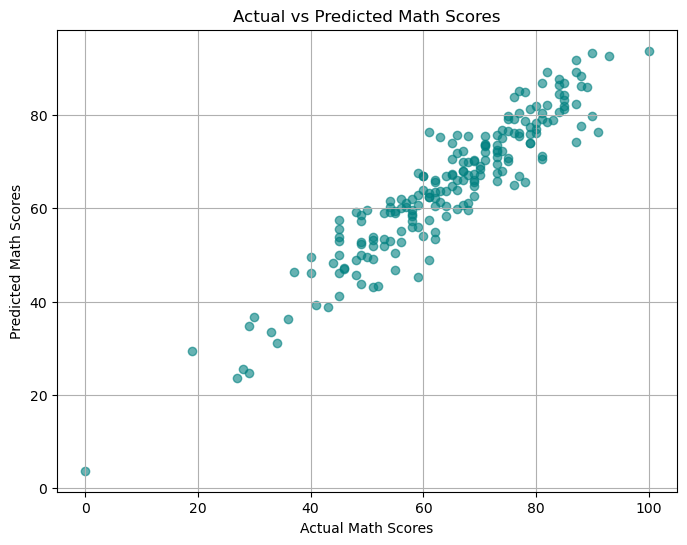

/tmp/ipykernel_590/872706451.py:78: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


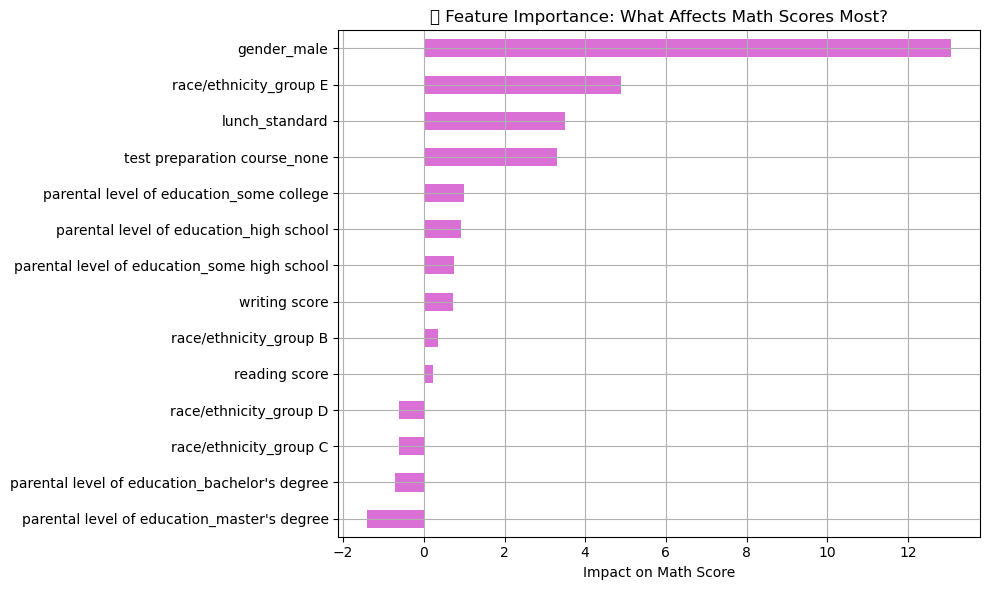

In [3]:
# 📚 AI for SDG 4: Predicting Student Exam Performance

# 🧠 1. Introduction
"""
UN SDG Goal: Quality Education (SDG 4)
Project Goal: Use Machine Learning to predict students' math exam scores using demographic and academic background features.
Impact: Helps schools identify and support struggling students early, promoting inclusive education.
"""

# 📦 2. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 🎓 3. Load Dataset
df = pd.read_csv("StudentsPerformance.csv")  
df.head()

# 🔍 4. Data Exploration
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
df.describe()

# 📊 Visualizing Distributions
sns.histplot(df["math score"], kde=True)
plt.title("Math Score Distribution")
plt.show()

# 🔤 5. Data Preprocessing (Encoding Categorical Variables)
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

# 🎯 6. Features and Target Variable
X = df_encoded.drop("math score", axis=1)
y = df_encoded["math score"]

# 🔀 7. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 8. Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 9. Make Predictions
y_pred = model.predict(X_test)

# 🧮 10. Evaluate Model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# 🔍 11. Visualize Actual vs Predicted Scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="teal")
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.grid(True)
plt.show()

# 💡 3rd Graph: Feature Importance (Linear Regression Coefficients)

coefficients = pd.Series(model.coef_, index=X.columns)
coefficients = coefficients.sort_values()

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='orchid')
plt.title("🔍 Feature Importance: What Affects Math Scores Most?")
plt.xlabel("Impact on Math Score")
plt.grid(True)
plt.tight_layout()
plt.show()
